In [1]:
#1. Start with an empty network with no occupied vertices. Let c = 0 be the number of clusters
#in the network initially. Choose at random an order in which the vertices will be added to
#the network.
#2. Add the next vertex in the chosen order, initially with no edges. This vertex is a cluster in
#its own right, so increase c by one and label the vertex with label c to indicate which cluster
#it belongs to. Also make a note that cluster c has size 1.

import random
import math
import matplotlib.pyplot as plt

N = 10**5
prob = 0.0001   #so the number of edges is prob*N^2/2
edge_num = math.floor(prob*N*(N-1)/2)
orders = list(range(N))
random.shuffle(orders)

# initiate network
nodes = [set() for index in range(N)]
for i in range(edge_num):
      node1 = random.randrange(N);
      node2 = random.randrange(N);
      if node1 != node2:
            nodes[node1].add(node2)
            nodes[node2].add(node1)

print("Graph created")
#print(orders)

Graph created


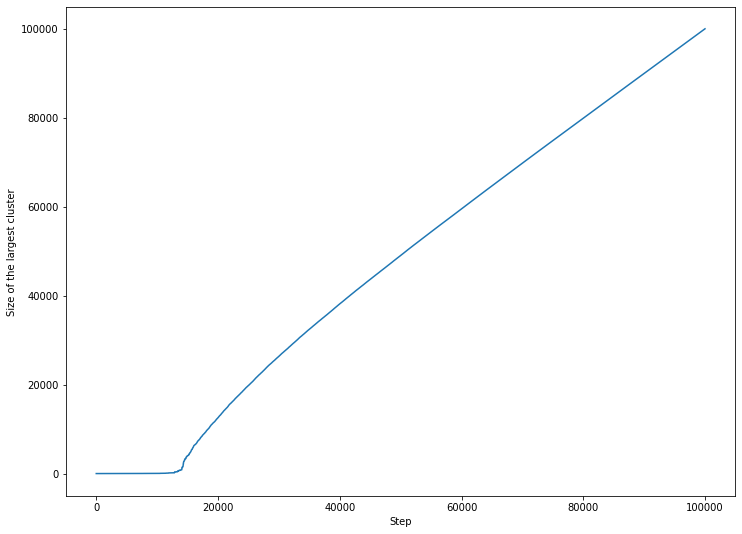

In [3]:
#3. Go through the edges attached to this vertex one by one. For each edge determine whether
#the vertex at the other end has already been added to the network. If it has, add the edge to
#the network.
X=[]
Y=[]
largest = 0
ptrs = [-(N+1) for index in range(N)]
def findRoot(i):
    if ptrs[i] < 0 and ptrs[i] != -(N+1):     # if it is negative && added, then it's root
          return i;
    else:
          ptrs[i] = findRoot(ptrs[i]);        # find root and assign root through the way
          return ptrs[i]

for i in range(N):
      order = orders[i]
      ptrs[order] = -1;
      if largest == 0:
            largest = 1
      for neighbor in nodes[order]:
            ran = random.random()
            if ran < 0.8:
            #print("the neighbor " + str(neighbor))
                if ptrs[neighbor] > -(N+1) and ptrs[neighbor] <0:
                        ptrs[order] += ptrs[neighbor];
                        ptrs[neighbor] = order;
                elif ptrs[neighbor] > -1 and ptrs[neighbor] != order: 
                        neigh_root = findRoot(neighbor);
                        if neigh_root != order:
                              ptrs[order] += ptrs[neigh_root];
                              ptrs[neighbor] = order;
                              ptrs[neigh_root] = order;
                if - ptrs[order] > largest:
                         largest = - ptrs[order]
      X += [i,]
      Y += [largest, ]
            #print("its pointers2" + str(ptrs))
#4. As each edge is added, examine the cluster labels of the vertices at either end. If they are
#the same, do nothing. If they are different, choose one of the clusters and relabel all its
#vertices to have the same label as the other cluster. Update the record of the size of the
#cluster to be equal to the sum of the sizes of the two clusters from which it was formed.
#5. Repeat from step 2 until all vertices have been added.
fig= plt.figure(figsize=(12,9))
plt.plot(X, Y, '-')
plt.xlabel("Step")
plt.ylabel("Size of the largest cluster")
#plt.title("N = 10^")
plt.show()
